In [1]:
%config InlineBackend.figure_formats = ['svg']

import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
from sympy.abc import *
import numpy as np


import matplotlib.pyplot as plt

sp.init_printing(use_latex='mathjax', latex_mode='equation*')

# Beispiel: Eigenvektoren und Nachgiebigkeitsmatrix

## Aufgabenstellung

Das System in @fig-system zeigt einen Rahmen, welcher als Zweimassenschwinger modelliert werden kann.


![Statisches System des 2-Massenschwingers](bilder/mms1.jpg){#fig-system width=50%}

Gesucht:

-  Eigenkreisfrequenz $\omega$ 
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
1 &  \\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
1 &  \\
\end{bmatrix}$$

- Skizze der Eigenformen 

Gegeben:

- Biegesteifigkeit aller Stäbe $E\cdot I = 20\cdot 10^{12} \text{Nmm}^2$
- Dehnsteifigkeit aller Stäbe $E\cdot A = \infty$
- Einzelmassen $m_1 = 1000 \text{kg}$ und $m_2 = 1000 \text{kg}$
- Länge $l = 4000 \text{mm}$

{{< pagebreak >}}
## Musterlösung

In [2]:
#| label: tbl-parameter_mms1
#| tbl-cap: Verwendete Parameter

params = {'EI': 20*10**12 *unit.N*unit.mm**2,
          'm_1':1000*unit.N*unit.second**2/unit.m,
          'm_2':1000*unit.N*unit.second**2/unit.m,
          'l':4*unit.m,
          }

          
render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EI = 20000000000000 \text{mm}^{2} \text{N}$ | $l = 4 \text{m}$ |
| $m_{1} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{2} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ |


In [3]:
omega, t,  l, m_1, m_2, EI = sp.symbols('omega, t,  l, m_1, m_2, EI')

omega_n = sp.symbols('omega_n')

### Nachgiebigkeitsmatrix $\mathbf{D}$ {#sec-nachgiebigkeit}

Die Steifigkeitsmatrix lässt sich durch Invertierung der Nachgiebigkeitsmatrix beschreiben. Die Nachgiebigkeitsmatrix $\mathbf{D}$ beschreibt die Deformation an einem Massenpunkt. Die Einträge der $\mathbf{D}$ - Matrix beschreiben die Deformationen für unterschiedliche Laststellungen.

$$\mathbf{K} = \mathbf{D^{-1}}$$

![Balken mit 2 Einzelmassen](bilder/bsp_nachgib.jpg){#fig-2mms}

Für einen 2-Massenschwinger, wie in @fig-2mms , hat die Nachgiebigkeitsmatrix folgende Form:

$$\mathbf{D} = \frac{1}{EI}\cdot \begin{bmatrix}
\delta_{11} & \delta_{12}\\
\delta_{21} & \delta_{22} 
\end{bmatrix}$$

wobei gilt:

$\delta_{ab}$ : $a$ ist die Lastsituation, $b$ ist die Masse.


#### Anwendung 

![Schnittgrössen für beide Lastfälle zur Bestimmung der Deformation](bilder/rahmen_def.jpg){#fig-schnittgrössen}

$$\delta_{ab} = \frac{1}{EI}\int_{0}^{l} M_a\bar{M_b} \,dx$$

Es werden 2 Laststellungen betrachtet, jeweils an einem Massenpunkt. Dabei ist Beachtung der Einheit der Einwirkung zu schenken. Diese wird einheitslos angesetzt.

In [4]:
delta_11 = 1/(EI) * (sp.Rational(1,3) * -l*-l*1*l)* 2
delta_12 = 1/(EI) * ((sp.Rational(1,3) * -l*-l*1*l) + (sp.Rational(1,2) * -l*-l*1*l))
delta_21 = delta_12
delta_22 = 1/(EI) * ((sp.Rational(1,3) * -l*-l*1*l)* 2 + -l*-l*1*l)

render.eq_display('delta_11', delta_11,
                  'delta_12', delta_12,
                  'delta_21', delta_21,
                  'delta_22', delta_22)


         3
      2⋅l 
δ₁₁ = ────
      3⋅EI

         3
      5⋅l 
δ₁₂ = ────
      6⋅EI

         3
      5⋅l 
δ₂₁ = ────
      6⋅EI

         3
      5⋅l 
δ₂₂ = ────
      3⋅EI

In [5]:
D = sp.Matrix([[delta_11, delta_12],[delta_21, delta_22]])
K = D.inv()
render.eq_display(sp.MatrixSymbol('D', 2,2), D,
                  sp.MatrixSymbol('K', 2,2), K)

    ⎡   3     3⎤
    ⎢2⋅l   5⋅l ⎥
    ⎢────  ────⎥
    ⎢3⋅EI  6⋅EI⎥
D = ⎢          ⎥
    ⎢   3     3⎥
    ⎢5⋅l   5⋅l ⎥
    ⎢────  ────⎥
    ⎣6⋅EI  3⋅EI⎦

    ⎡ 4⋅EI   -2⋅EI ⎤
    ⎢ ────   ──────⎥
    ⎢   3       3  ⎥
    ⎢  l       l   ⎥
K = ⎢              ⎥
    ⎢-2⋅EI    8⋅EI ⎥
    ⎢──────   ──── ⎥
    ⎢   3        3 ⎥
    ⎣  l      5⋅l  ⎦

### Eigenvektoren

Die Bewegungsgleichung für einen ungedämpften, frei schwingenden Mehrmassenschwinger lässt sich folgender massen aufstellen:

$$\mathbf{M u''(t) + K u(t)} = 0$$

Die Modale Analyse entkoppelt die Gleichungen um diese unabhängig von einander zu lösen.

#### Massenmatrix $\mathbf{M}$

In [6]:
M = sp.Matrix([[m_1,0],[0,m_2]])

render.eq_display(sp.MatrixSymbol('M',2,2), M)

    ⎡m₁  0 ⎤
M = ⎢      ⎥
    ⎣0   m₂⎦

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand @eq-eigenkreisfrequenzen bestimmen:

$$
\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}
$${#eq-eigenkreisfrequenzen}

In [7]:
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      12.1 
ω₁ = ──────
     second

      40.0 
ω₂ = ──────
     second

#### Eigenvektoren $\mathbf{\phi}$
$$
\phi_n = \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
$$
$$
[\mathbf{K}-\omega_n^2 \mathbf{M}]\cdot \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
=0$$



Dazu ist die entsprechende Normierung aus der Aufgabenstellung zu berücksichtigen.

In [8]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')
params['phi_11'] = 1

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_21 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_21).values())[0]

params['phi_21'] = phi_21.subs(params).simplify() 




render.eq_display((K-omega_1**2 *M)*phi_1,sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))


⎡                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₂₁       ⎜4⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅m₁  + 5⋅m₁⋅m₂ + 25⋅
⎢- ──────── + φ₁₁⋅⎜──── - m₁⋅⎜─────── + ───── - ──────────────────────────────
⎢      3          ⎜  3       ⎜   3       3                     3              
⎢     l           ⎝ l        ⎝5⋅l ⋅m₂   l ⋅m₁               5⋅l ⋅m₁⋅m₂        
⎢                                                                             
⎢                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₁₁       ⎜8⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅m₁  + 5⋅m₁⋅m₂ + 25⋅
⎢- ──────── + φ₂₁⋅⎜──── - m₂⋅⎜─────── + ───── - ──────────────────────────────
⎢      3          ⎜   3      ⎜   3       3                     3              
⎣     l           ⎝5⋅l       ⎝5⋅l ⋅m₂   l ⋅m₁       

     ⎡1.0 ⎤
φ₁ = ⎢    ⎥
     ⎣1.77⎦

In [9]:
params['phi_12'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_22 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_22).values())[0]

params['phi_22'] = phi_22.subs(params).simplify() 




render.eq_display((K-omega_2**2 *M)*phi_2,sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))


⎡                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₂₂       ⎜4⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅m₁  + 5⋅m₁⋅m₂ + 25⋅
⎢- ──────── + φ₁₂⋅⎜──── - m₁⋅⎜─────── + ───── + ──────────────────────────────
⎢      3          ⎜  3       ⎜   3       3                     3              
⎢     l           ⎝ l        ⎝5⋅l ⋅m₂   l ⋅m₁               5⋅l ⋅m₁⋅m₂        
⎢                                                                             
⎢                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₁₂       ⎜8⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅m₁  + 5⋅m₁⋅m₂ + 25⋅
⎢- ──────── + φ₂₂⋅⎜──── - m₂⋅⎜─────── + ───── + ──────────────────────────────
⎢      3          ⎜   3      ⎜   3       3                     3              
⎣     l           ⎝5⋅l       ⎝5⋅l ⋅m₂   l ⋅m₁       

     ⎡ 1.0  ⎤
φ₂ = ⎢      ⎥
     ⎣-0.566⎦

#### Orthogonalitätsbedingung
Zur effektiven Entkoppelung der Gleichungen muss die Orthogonalitätsbedingung eingehalten sein. Durch die Orthogonalität der Vektoren $\phi_1$ und $\phi_2$ kann mittels einem Einmassenschwingers sämtliches Verhalten von $\phi_1$ beschrieben werden und mittels einem zweiten Einmassenschwinger sämtliches Verhalten von $\phi_2$. Ist die Orthogonalität nicht gegeben, so müsste der erste Einmassenschwinger Anteile aus $\phi_1$ und $\phi_2$ beschreiben.

Dies gilt es für die Massenmatrix zu kontrollieren:

$$\phi_1^T \mathbf{ M } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_1 = 0$$

Sowohl auch für die Steifigkeitsmatrix:

$$\phi_1^T \mathbf{ K } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_1 = 0$$


Angewendet auf die Aufgabe:

In [10]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                     2⎤
  T        ⎢4.12e+3⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                     2⎤
  T        ⎢1.32e+3⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

  T           
φ₂ ⋅M⋅φ₁ = [0]

  T           
φ₁ ⋅M⋅φ₂ = [0]

Für die Steifigkeitsmatrix:

In [11]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(3))

  T        ⎡6.02e+5⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡2.12e+6⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

### Eigenformen

![Die beiden Eigenformen skizziert](bilder/eigenformen.jpg){#fig-eigenformen}

{{< pagebreak >}}

# Beispiel: Eigenvektoren mit direkt bestimmter Steifigkeitsmatrix{#sec-mms_rahmen}

## Aufgabenstellung


Das System in @fig-system_mms2 zeigt ein Rahmentragwerk, welches als Zweimassenschwinger modelliert werden kann.

![Statisches System des Rahmentragwerks](bilder/system_mms2.jpg){#fig-system_mms2 width=70%}

Gesucht:

-  Eigenkreisfrequenz $\omega$ 
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
 &  1\\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
 &  1\\
\end{bmatrix}$$

- Skizze der Eigenformen 

Gegeben:

- Elastizitätsmodul der Stützen $E = 30000 \text{N}/{mm}^2$
- Flächenträgheitsmoment der Stützen $I = 2 \cdot 10^9 \text{mm}^4$
- Dehnsteifigkeit aller Stäbe $E\cdot A = \infty$
- Einzelmassen $m = 20000 \text{kg}$

{{< pagebreak >}}

## Musterlösung

In [12]:
#| label: tbl-parameter_mms2
#| tbl-cap: Verwendete Parameter

params = {'E': 30*10**3 *unit.N/unit.mm**2,
          'I':2*10**9*unit.mm**4,
          'm_1':2*20000*unit.N*unit.second**2/unit.m,
          'm_2':20000*unit.N*unit.second**2/unit.m,
          'l':4*unit.m,
          'H':3.2*unit.m,
          }


render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{30000 \text{N}}{\text{mm}^{2}}$ | $H = 3.2 \text{m}$ |
| $I = 2000000000 \text{mm}^{4}$ | $l = 4 \text{m}$ |
| $m_{1} = \frac{40000 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{2} = \frac{20000 \text{N} \text{s}^{2}}{\text{m}}$ |


In [13]:
omega, t,  l, m_1, m_2, E,I, H = sp.symbols('omega, t,  l, m_1, m_2, E, I, H')

omega_n = sp.symbols('omega_n')

### Eigenkreisfrequenzen
#### Steifigkeitsmatrix $\mathbf{K}$

Zur Bestimmung der Steifigkeitsmatrix ist das System an jedem Freiheitsgrad auszulenken, wie in @fig-steifigkeit dargestellt ist.

![Auslenkung der Freiheitsgrade zur Bestimmung der Steifigkeit](bilder/steifigkeit_mms2.jpg){#fig-steifigkeit}

Wichtig dabei sind die Richtungen der Kräfte. Als Denkstütze gilt folgendes:

- Der Auslenkung um $u$ wirkt die Federkraft entgegen, welche $k u$ entspricht.
- Zusätzlich wirkt die Trägheitskraft der Auslenkung entgegen, welche $m u''$ entspricht.
- Nach der Betrachtung des ausgelenkten Punkts, kann mittels *Actio-Reactio*-Prinzip das "*Stockwerk*" ins Gleichgewicht gebracht werden.
- Vorzeichen sind gegen der Bewegungsrichtig positiv.

#### Horizontale Steifigkeit

Für entsprechende Anwendungsfälle gibt es fertige Lösungen zur Bestimmung der Steifigkeit. Gemäss @fig-system_mms2 ist die Stütze am Fuss- und Kopfpunkt eingespannt. Somit resultiert die Steifigkeit zu:

$$k_{Stuetze} = \frac{12EI_{Stuetze}}{H^3}$$

Diese gilt für eine einzelne Stütze.

In [14]:
k_1, k_2 = sp.symbols('k_1, k_2')

params['k_1'] = 2*(12 * 2*E*I / H**3).subs(params).simplify().evalf(6)
params['k_2'] = 2*(12 * E*I / H**3).subs(params).simplify().evalf(6)
K = sp.Matrix([[k_1 + k_2, -k_2],[-k_2, k_2]])


render.eq_display(sp.MatrixSymbol('K', 2,2), K,
                  sp.MatrixSymbol('K', 2,2), K.subs(params),
                  )

    ⎡k₁ + k₂  -k₂⎤
K = ⎢            ⎥
    ⎣  -k₂    k₂ ⎦

    ⎡ 1.31836e+8⋅newton   -4.39453e+7⋅newton ⎤
    ⎢ ─────────────────   ───────────────────⎥
    ⎢       meter                meter       ⎥
K = ⎢                                        ⎥
    ⎢-4.39453e+7⋅newton    4.39453e+7⋅newton ⎥
    ⎢───────────────────   ───────────────── ⎥
    ⎣       meter                meter       ⎦

### Eigenvektoren
#### Massenmatrix $\mathbf{M}$ 

Die Massenmatrix folgt dem gleichen Aufbau wie die Steifigkeitsmatrix. Es gelten die gleichen Vorzeichenregelungen.

In [15]:
m_1, m_2 = sp.symbols('m_1, m_2')
M = sp.Matrix([[m_1, 0],[0, m_2]])

render.eq_display(sp.MatrixSymbol('M', 2,2), M,
                  sp.MatrixSymbol('M', 2,2), M.subs(params))

    ⎡m₁  0 ⎤
M = ⎢      ⎥
    ⎣0   m₂⎦

    ⎡                   2                      ⎤
    ⎢40000⋅newton⋅second                       ⎥
    ⎢────────────────────           0          ⎥
    ⎢       meter                              ⎥
M = ⎢                                          ⎥
    ⎢                                         2⎥
    ⎢                      20000⋅newton⋅second ⎥
    ⎢         0            ────────────────────⎥
    ⎣                             meter        ⎦

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}$$

In [16]:
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      33.1 
ω₁ = ──────
     second

      66.3 
ω₂ = ──────
     second

#### Eigenvektoren $\phi$

In [17]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')
params['phi_21'] = 1

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_11 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_11).values())[0]

params['phi_11'] = phi_11.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_1**2 *M)*phi_1),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₁⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₁ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₁⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₁ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡0.5⎤
φ₁ = ⎢   ⎥
     ⎣1.0⎦

In [18]:
params['phi_22'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_12 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_12).values())[0]

params['phi_12'] = phi_12.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_2**2 *M)*phi_2),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₂⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₂ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₂⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₂ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡-1.0⎤
φ₂ = ⎢    ⎥
     ⎣1.0 ⎦

#### Orthogonalitätsbedingung

Zur Entkoppelung der Gleichungen muss die Orthogonalitätsbedingung eingehalten sein.

Dies gilt es für die Massenmatrix zu kontrollieren:

$$\phi_1^T \mathbf{ M } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_1 = 0$$

Sowohl auch für die Steifigkeitsmatrix:

$$\phi_1^T \mathbf{ K } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_1 = 0$$

Angewendet auf die Aufgabe:


In [19]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                    2⎤
  T        ⎢3.0e+4⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

           ⎡                    2⎤
  T        ⎢6.0e+4⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

  T           
φ₂ ⋅M⋅φ₁ = [0]

  T           
φ₁ ⋅M⋅φ₂ = [0]

Für die Steifigkeitsmatrix:

In [20]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(4),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(4))

  T        ⎡3.3e+7⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢─────────────⎥
           ⎣    meter    ⎦

  T        ⎡2.64e+8⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

### Eigenformen

![Die beiden Eigenformen skizziert](bilder/eigenformen_mms2.jpg){#fig-eigenformen}

{{< pagebreak >}}

# Beispiel: Balken ohne Tilger

## Aufgabenstellung

Ein einfacher Balken mit einer Einzelmasse, welcher in dieser Aufgabe ohne Tilger ausgestattet ist, ist in @fig-system_ohne_tilger dargestellt. Die Masse erfährt eine dynamische Einwirkung durch die Funktion $F(t)$. Das Beispiel wird in @sec-tilger weitergeführt.

![Statisches System des Balkens ohne Tilger](bilder/mms3system.jpg){#fig-system_ohne_tilger}

Gesucht:

- Maximale dynamische Verformung mittels stationärer Lösung
- Maximale dynamische Beschleunigung mittels stationärer Lösung

Gegeben:

- Biegestab $E = 200000 \text{N}/{mm}^2$
- Flächenträgheitsmoment des Stabs $I = 2 \cdot 10^8 \text{mm}^4$
- Punktmasse $m_H = 2000 \text{kg}$

$$
F(t) = F_0 \cdot \sin(\omega\cdot t) = 0.8 \text{kN} \cdot (12.6 \frac{\text{rad}}{\text{s}}\cdot t)
$$

{{< pagebreak >}}

## Musterlösung

In [21]:
#| label: tbl-parameter_mms3
#| tbl-cap: Verwendete Parameter

params = {'E': 200*10**3 *unit.N/unit.mm**2,
          'I':2*10**8*unit.mm**4,
          'm_H':2000*unit.N*unit.second**2/unit.m,
          'l':5*unit.m,
          'F_0':0.8*10**3*unit.N,
          'omega':12.6/unit.second,
          'phi_11':1,
          'phi_12':1,
          'zeta':0.0         
          }

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{200000 \text{N}}{\text{mm}^{2}}$ | $F_{0} = 800.0 \text{N}$ |
| $I = 200000000 \text{mm}^{4}$ | $l = 5 \text{m}$ |
| $m_{H} = \frac{2000 \text{N} \text{s}^{2}}{\text{m}}$ | $\omega = \frac{12.6}{\text{s}}$ |
| $\phi_{11} = 1$ | $\phi_{12} = 1$ |
| $\zeta = 0.0$ | |


In [22]:
E, I, m_H, zeta,  l, F_0, omega, delta_11, delta_12 = sp.symbols('E, I, m_H, zeta, l, F_0, omega, delta_11, delta_12')

t = sp.symbols('t')

In [23]:
F_t = F_0 * sp.sin(omega*t)

### Steifigkeit $k$

In [24]:
k_H = 48 * (E*I) / (2*l)**3


render.eq_display('k_H', k_H,
                  'k_H',k_H.subs(params).simplify().evalf(3))


      6⋅E⋅I
k_H = ─────
         3 
        l  

      1.92e+6⋅newton
k_H = ──────────────
          meter     

### Eigenkreisfrequenz $\omega$

In [25]:
omega_n = sp.sqrt(k_H / m_H)

render.eq_display('omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

             ________
            ╱  E⋅I   
ωₙ = √6⋅   ╱  ────── 
          ╱    3     
        ╲╱    l ⋅m_H 

      31.0 
ωₙ = ──────
     second

### Vergrösserungsfaktor $V(\omega)$

In [26]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 1.2

### Stationäre Lösung

#### Statische Deformation

In [27]:
u_0 = F_0 / k_H

render.eq_display('u_0', 'F_0 / k_H',
                  'u_0', u_0,
                  'u_0', unit.convert_to(u_0.subs(params).simplify().evalf(4), unit.mm))

      F₀
u₀ = ───
     k_H

         3
     F₀⋅l 
u₀ = ─────
     6⋅E⋅I

u₀ = 0.4167⋅millimeter

#### Stationäre maximale Deformation

In [28]:
u_stat = u_0 * V_omega

render.eq_display('u_stat', 'u_0 * V(omega)',
                  'u_stat', u_stat,
                  'u_stat', unit.convert_to(u_stat.subs(params).simplify().evalf(3), unit.mm))

uₛₜₐₜ = u₀⋅V(ω)

                                 3                     
                             F₀⋅l                      
uₛₜₐₜ = ───────────────────────────────────────────────
                    ___________________________________
                   ╱                2                  
                  ╱  ⎛     3      2⎞       3      2  2 
                 ╱   ⎜    l ⋅m_H⋅ω ⎟    2⋅l ⋅m_H⋅ω ⋅ζ  
        6⋅E⋅I⋅  ╱    ⎜1 - ─────────⎟  + ────────────── 
              ╲╱     ⎝      6⋅E⋅I  ⎠        3⋅E⋅I      

uₛₜₐₜ = 0.499⋅millimeter

#### Stationäre maximale Beschleunigung

In [29]:
V_a_omega = omega**2 / omega_n**2 * V_omega

u_2_stat =  F_0 / m_H * V_a_omega

render.eq_display('V_a(omega)', "omega**2 / omega_n**2 * V_omega",
                  'V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),
                  'Derivative(u_stat,t,2)', u_2_stat.subs(params).simplify().evalf(3))

             2
        V_ω⋅ω 
Vₐ(ω) = ──────
           2  
         ωₙ   

Vₐ(ω) = 0.198

  2                      
 d           0.0793⋅meter
───(uₛₜₐₜ) = ────────────
  2                  2   
dt             second    

{{< pagebreak >}}

# Beispiel: Balken mit Tilger{#sec-tilger}


## Aufgabenstellung

Ein einfacher Balken mit einer Einzelmasse, welcher in dieser Aufgabe mit Tilger ausgestattet ist, ist in @fig-tilger dargestellt. Die Masse erfährt eine dynamische Einwirkung durch die Funktion $F(t)$. 

![Statisches System des Balkens mit Tilger](bilder/mms4system.jpg){#fig-tilger}

Gesucht:

- Maximale dynamische Verformung mittels stationärer Lösung
- Maximale dynamische Beschleunigung mittels stationärer Lösung

Gegeben:

- Biegestab $E = 200000 \text{N}/{mm}^2$
- Flächenträgheitsmoment des Stabs $I = 2 \cdot 10^8 \text{mm}^4$
- Punktmasse $m_H = 2000 \text{kg}$
- Tilgermasse $m_T = 150 \text{kg}$
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
 1 &  \\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
 1 &  \\
\end{bmatrix}$$


$$
F(t) = F_0 \cdot \sin(\omega\cdot t) = 0.8 \text{kN} \cdot (12.6 \frac{\text{rad}}{\text{s}}\cdot t)
$$

{{< pagebreak >}}

## Musterlösung

In [30]:
#| label: tbl-parameter_mms4
#| tbl-cap: Verwendete Parameter

params = {'E': 200*10**3 *unit.N/unit.mm**2,
          'I':2*10**8*unit.mm**4,
          'm_H':2000*unit.N*unit.second**2/unit.m,
          'm_T':100*unit.N*unit.second**2/unit.m,
          'k_T':90*10**3*unit.N/unit.m,
          'l':5*unit.m,
          'F_0':0.8*10**3*unit.N,
          'omega':12.6/unit.second,
          'phi_11':1,
          'phi_12':1,
          'zeta':0.0         
          }

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{200000 \text{N}}{\text{mm}^{2}}$ | $F_{0} = 800.0 \text{N}$ |
| $I = 200000000 \text{mm}^{4}$ | $k_{T} = \frac{90000 \text{N}}{\text{m}}$ |
| $l = 5 \text{m}$ | $m_{H} = \frac{2000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $m_{T} = \frac{100 \text{N} \text{s}^{2}}{\text{m}}$ | $\omega = \frac{12.6}{\text{s}}$ |
| $\phi_{11} = 1$ | $\phi_{12} = 1$ |
| $\zeta = 0.0$ | |


In [31]:
E, I, m_H, m_T, k_T, l, F_0, omega, delta_11, delta_12 = sp.symbols('E, I, m_H, m_T, k_T, l, F_0, omega, delta_11, delta_12')

t = sp.symbols('t')

In [32]:
F_t = F_0 * sp.sin(omega*t)

### Bemerkung Tilgerauslegung

Die Auslegung des Tilgers kann folgender massen geschehen:

- Tilgermasse $5\%$ von der Masse des Hauptträgers.
- Optimale Frequenz bestimmen: $$f_{T,opt} =\frac{f_H}{1+\frac{m_T}{m_H}}$$
- Daraus die optimale Steifigkeit bestimmen:$$k_{T,opt} = (2 \pi f_{T,opt})^2$$

### Steifigkeitsmatrix $\mathbf{K}$


![Verformungen an den beiden Freiheitsgraden](bilder/mms3_steifigkeit.jpg){#fig-verformungen}


Wichtig dabei sind die Richtungen der Kräfte. Als Denkstütze gilt folgendes:

- Der Auslenkung um $u$ wirkt die Federkraft entgegen, welche $k u$ entspricht.
- Zusätzlich wirkt die Trägheitskraft der Auslenkung entgegen, welche $m u''$ entspricht.
- Nach der Betrachtung des ausgelenkten Punkts, kann mittels *Actio-Reactio*-Prinzip das "*Stockwerk*" ins Gleichgewicht gebracht werden.
- Vorzeichen sind gegen der Bewegungsrichtig positiv.

In [33]:
k_T, k_H = sp.symbols('k_T, k_H')

params['k_H'] = (48 * E*I / (2*l)**3).subs(params).simplify()
K = sp.Matrix([[k_H + k_T, -k_T],[-k_T, k_T]])


render.eq_display(sp.MatrixSymbol('K', 2,2), K,
                  sp.MatrixSymbol('K', 2,2), K.subs(params),
                  )

    ⎡k_H + k_T  -k_T⎤
K = ⎢               ⎥
    ⎣  -k_T     k_T ⎦

    ⎡2010000⋅newton  -90000⋅newton ⎤
    ⎢──────────────  ──────────────⎥
    ⎢    meter           meter     ⎥
K = ⎢                              ⎥
    ⎢-90000⋅newton    90000⋅newton ⎥
    ⎢──────────────   ──────────── ⎥
    ⎣    meter           meter     ⎦

### Eigenvektoren
#### Massenmatrix $\mathbf{M}$ 

Die Massenmatrix folgt dem gleichen Aufbau der Steifigkeitsmatrix. Es gelten die gleichen Vorzeichenregelungen. Die Einträge beziehen sich auf @fig-verformungen .

In [34]:
M = sp.Matrix([[m_H, 0],[0, m_T]])

render.eq_display(sp.MatrixSymbol('M', 2,2), M,
                  sp.MatrixSymbol('M', 2,2), M.subs(params))

    ⎡m_H   0 ⎤
M = ⎢        ⎥
    ⎣ 0   m_T⎦

    ⎡                  2                    ⎤
    ⎢2000⋅newton⋅second                     ⎥
    ⎢───────────────────          0         ⎥
    ⎢       meter                           ⎥
M = ⎢                                       ⎥
    ⎢                                      2⎥
    ⎢                     100⋅newton⋅second ⎥
    ⎢         0           ──────────────────⎥
    ⎣                           meter       ⎦

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}$$

In [35]:
omega_n =sp.symbols('omega_n')
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      27.3 
ω₁ = ──────
     second

      34.1 
ω₂ = ──────
     second

#### Eigenvektoren $\mathbf{\phi}$

$$
\phi_n = \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
$$
$$
[\mathbf{K}-\omega_n^2 \mathbf{M}]\cdot \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
=0$$


Dazu ist die entsprechende Normierung aus der Aufgabenstellung zu berücksichtigen.

In [36]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_21 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_21).values())[0]

params['phi_21'] = phi_21.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_1**2 *M)*phi_1),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))


⎡                   ⎛                                _________________________
⎢                   ⎜                               ╱    2    2               
⎢               φ₁₁⋅⎝-k_T⋅m_H + m_T⋅(k_H + k_T) + ╲╱  k_H ⋅m_T  - 2⋅k_H⋅k_T⋅m_
⎢-k_T⋅m_T⋅φ₂₁ + ──────────────────────────────────────────────────────────────
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                     m_T     
⎢                                                                             
⎢                   ⎛                               __________________________
⎢                   ⎜                              ╱    2    2                
⎢               φ₂₁⋅⎝k_T⋅m_H - m_T⋅(k_H + k_T) + ╲╱  k_H ⋅m_T  - 2⋅k_H⋅k_T⋅m_H
⎢-k_T⋅m_H⋅φ₁₁ + ──────────────────────────────────────────────────────────────
⎢                                                   

     ⎡1.0 ⎤
φ₁ = ⎢    ⎥
     ⎣5.79⎦

In [37]:
phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_22 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_22).values())[0]

params['phi_22'] = phi_22.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_2**2 *M)*phi_2),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))


⎡                   ⎛                                _________________________
⎢                   ⎜                               ╱    2    2               
⎢               φ₁₂⋅⎝-k_T⋅m_H + m_T⋅(k_H + k_T) - ╲╱  k_H ⋅m_T  - 2⋅k_H⋅k_T⋅m_
⎢-k_T⋅m_T⋅φ₂₂ + ──────────────────────────────────────────────────────────────
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                     m_T     
⎢                                                                             
⎢                   ⎛                               __________________________
⎢                   ⎜                              ╱    2    2                
⎢               φ₂₂⋅⎝k_T⋅m_H - m_T⋅(k_H + k_T) - ╲╱  k_H ⋅m_T  - 2⋅k_H⋅k_T⋅m_H
⎢-k_T⋅m_H⋅φ₁₂ + ──────────────────────────────────────────────────────────────
⎢                                                   

     ⎡ 1.0 ⎤
φ₂ = ⎢     ⎥
     ⎣-3.46⎦

#### Orthogonalitätsbedingung

Zur effektiven Entkoppelung der Gleichungen muss die Orthogonalitätsbedingung eingehalten sein. 
Dies gilt es für die Massenmatrix zu kontrollieren:

$$\phi_1^T \mathbf{ M } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_1 = 0$$

Sowohl auch für die Steifigkeitsmatrix:

$$\phi_1^T \mathbf{ K } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_1 = 0$$


Angewendet auf die Aufgabe:



In [38]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*M*phi_1)).subs(params).evalf(7),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(7))

           ⎡                     2⎤
  T        ⎢5.35e+3⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                     2⎤
  T        ⎢3.19e+3⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                         2⎤
  T        ⎢3.051758e-5⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₁ = ⎢──────────────────────────⎥
           ⎣          meter           ⎦

           ⎡                         2⎤
  T        ⎢3.051758e-5⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₂ = ⎢──────────────────────────⎥
           ⎣          meter           ⎦

Es ist eine kleine numerische Differenz zu erkennen.

In [39]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(3))

  T        ⎡3.98e+6⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡3.71e+6⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

### Modale Analyse

Die Bewegungsgleichung für einen ungedämpften, periodisch, harmonisch angeregten Mehrmassenschwinger lässt sich folgend beschreiben:

$$\mathbf{M u''(t) + K u = F(t)}$$

Die Matrix-Gleichung beschreibt ein System aus Differentialgleichungen. Die Modale Analyse zielt darauf ab, diese zu entkoppeln. Bezogen auf den Mehrmassenschwinger heisst eine Entkoppelung, dass diese in Einmassenschwinger aufgeteilt werden. Dies wird nun schrittweise durchgeführt.

#### Modal- und Spektralmatrix

Mittels der Modal- und Spektralmatrix können die generalisierten Grössen ermittelt werden. Diese sind die eigenschaften der einzelnen Einmassenschwinger. Die generalisierten Werte besitzen keine physikalischen Werte, sie sind abhängig von der Wahl der Eigenvektoren, welche bekanntlich von der Normierung abhängen.


Aufgrund der Bewegungsgleichung können die generalisierten Grössen bestimmt werden, es gilt:

$$\Phi^T M \Phi u''(t) + \Phi^T K \Phi u(t) = \Phi^T F(t)$$

$$M^*u''(t) + K^* u(t) = F^* (t)$$

Alle $N$-Eigenwerte und alle $N$-Eigenvektoren können kompakt
mit Matrizen ausgedrückt werden:


In [40]:
Phi = sp.Matrix([[phi_1, phi_2]])
Omega = sp.Matrix([[omega_1, 0],[0, omega_2]])

render.eq_display('Modalmatrix', 'Phi',
                  sp.MatrixSymbol('Phi', 2, 2), Phi.subs(params).evalf(4),
                  'Spektralmatrix', 'Omega^2',
                  sp.MatrixSymbol('Omega^2', 2, 2), (Omega**2).subs(params).evalf(4))

Modalmatrix = Φ

    ⎡ 1.0    1.0  ⎤
Φ = ⎢             ⎥
    ⎣5.788  -3.455⎦

                  2
Spektralmatrix = Ω 

     ⎡ 744.5          ⎤
     ⎢───────     0   ⎥
     ⎢      2         ⎥
     ⎢second          ⎥
Ω² = ⎢                ⎥
     ⎢          1160.0⎥
     ⎢   0     ───────⎥
     ⎢               2⎥
     ⎣         second ⎦

#### Generalisierte Grössen


In [41]:
M_star = Phi.T * M * Phi
K_star = Phi.T * K * Phi
F_t_matrix = sp.Matrix([[F_t],[0]])
F_t_star = Phi.T * F_t_matrix

render.eq_display(sp.MatrixSymbol('M^\star', 2,2),sp.simplify(M_star.subs(params)).evalf(5),
                  sp.MatrixSymbol('K^\star', 2,2),sp.simplify(K_star.subs(params)).evalf(5),
                  sp.MatrixSymbol('F(t)', 2,1),sp.simplify(F_t_matrix.subs(params)).evalf(5),
                  sp.MatrixSymbol('F(t)^\star', 2,1),sp.simplify(F_t_star.subs(params)).evalf(5))

           ⎡                    2                       ⎤
           ⎢5350.6⋅newton⋅second                        ⎥
           ⎢─────────────────────            0          ⎥
           ⎢        meter                               ⎥
M__\star = ⎢                                            ⎥
           ⎢                                           2⎥
           ⎢                       3193.8⋅newton⋅second ⎥
           ⎢          0            ─────────────────────⎥
           ⎣                               meter        ⎦

           ⎡3.9837e+6⋅newton                  ⎤
           ⎢────────────────         0        ⎥
           ⎢     meter                        ⎥
K__\star = ⎢                                  ⎥
           ⎢                  3.7063e+6⋅newton⎥
           ⎢       0          ────────────────⎥
           ⎣                       meter      ⎦

       ⎡         ⎛12.6⋅t⎞       ⎤
       ⎢800.0⋅sin⎜──────⎟⋅newton⎥
F(t) = ⎢         ⎝second⎠       ⎥
       ⎢                        ⎥
       ⎣           0            ⎦

              ⎡         ⎛12.6⋅t⎞       ⎤
              ⎢800.0⋅sin⎜──────⎟⋅newton⎥
              ⎢         ⎝second⎠       ⎥
F(t)__\star = ⎢                        ⎥
              ⎢         ⎛12.6⋅t⎞       ⎥
              ⎢800.0⋅sin⎜──────⎟⋅newton⎥
              ⎣         ⎝second⎠       ⎦

#### Kontrolle der modalen Transformation

In [42]:
omega_1_kontrolle = sp.sqrt(K_star[0] / M_star[0])
omega_2_kontrolle = sp.sqrt(K_star[3] / M_star[3])

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_1_modal', omega_1_kontrolle.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(4),
                  'omega_2_modal', omega_2_kontrolle.subs(params).simplify().evalf(4))




      27.3 
ω₁ = ──────
     second

             27.3 
ω_1_modal = ──────
            second

     34.07 
ω₂ = ──────
     second

            34.07 
ω_2_modal = ──────
            second

### Stationäre Antwort

Die stationäre Antwort wird mittels des Vergrösserungsfaktors bestimmt.

Die entkoppelte Differentialgleichung ist nun die folgende:

$$m^\star_1 q_1''(t) + k^\star_1 q_1(t) = F^\star_1(t) = F^\star_1 \sin(\omega t)$$

$$m^\star_2 q_2''(t) + k^\star_2 q_2(t) = F^\star_2(t) = F^\star_2 \sin(\omega t)$$

Lösen lässt sich dies mit dem bekannten Ansatz:

$$q_n(t) = A_n \sin(\omega t) + B_n \cos(\omega)$$

Hier wird jedoch mit dem Vorgehen des Vergrösserungsfaktors verfahren:


#### Verformung

In [43]:
zeta = sp.symbols('zeta')

V_1_omega = 1/(sp.sqrt((1-(omega/omega_1)**2)**2 + (2*zeta*(omega/omega_1))**2))

q_1_stat = F_0 / K_star[0]
q_1_max = q_1_stat*V_1_omega

render.eq_display('V_1(omega)', '1/(sqrt((1-(omega/omega_1)**2)**2 + (2*zeta_*(omega/omega_1))**2))',
                  'V_1(omega)', V_1_omega.subs(params).simplify().evalf(3),
                  'q_1_stat', unit.convert_to(q_1_stat.subs(params).simplify().evalf(3), unit.mm),
                  'q_1_max', unit.convert_to(q_1_max.subs(params).simplify().evalf(3), unit.mm),)

                       1               
V₁(ω) = ───────────────────────────────
               ________________________
              ╱                      2 
             ╱     2  2   ⎛    2    ⎞  
            ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
           ╱    ─────── + ⎜- ─── + 1⎟  
          ╱         2     ⎜    2    ⎟  
        ╲╱        ω₁      ⎝  ω₁     ⎠  

V₁(ω) = 1.27

q₁ ₛₜₐₜ = 0.201⋅millimeter

q₁ ₘₐₓ = 0.255⋅millimeter

In [44]:

V_2_omega = 1/(sp.sqrt((1-(omega/omega_2)**2)**2 + (2*zeta*(omega/omega_2))**2))

q_2_stat = F_0 / K_star[3]
q_2_max = q_2_stat*V_2_omega



render.eq_display('V_2(omega)', '1/(sqrt((1-(omega/omega_2)**2)**2 + (2*zeta_*(omega/omega_2))**2))',
                  'V_2(omega)', V_2_omega.subs(params).simplify().evalf(3),
                  'q_2_stat', unit.convert_to(q_2_stat.subs(params).simplify().evalf(3), unit.mm),
                  'q_2_max', unit.convert_to(q_2_max.subs(params).simplify().evalf(3), unit.mm))

                       1               
V₂(ω) = ───────────────────────────────
               ________________________
              ╱                      2 
             ╱     2  2   ⎛    2    ⎞  
            ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
           ╱    ─────── + ⎜- ─── + 1⎟  
          ╱         2     ⎜    2    ⎟  
        ╲╱        ω₂      ⎝  ω₂     ⎠  

V₂(ω) = 1.16

q₂ ₛₜₐₜ = 0.216⋅millimeter

q₂ ₘₐₓ = 0.25⋅millimeter

##### Effektive Deformation

Die effektiven Grössen resultieren durch Multiplikation mit dem Eigenvektor. Für die erste Eigenkreisfrequenz:

In [45]:
u_1_stat = q_1_max*phi_1
u_2_stat = q_2_max*phi_2
u_stat = u_1_stat + u_2_stat

render.eq_display("u_1_stat","q_1_max*phi_1",
'Matrix([[u_11stat],[u_21stat]])',unit.convert_to(u_1_stat.subs(params).evalf(3),unit.mm))

u₁ ₛₜₐₜ = φ₁⋅q₁ ₘₐₓ

⎡u₁₁ₛₜₐₜ⎤   ⎡0.255⋅millimeter⎤
⎢       ⎥ = ⎢                ⎥
⎣u₂₁ₛₜₐₜ⎦   ⎣1.48⋅millimeter ⎦

Sowie für die zweite Eigenkreisfrequenz:

In [46]:
render.eq_display("u_2_stat","q_2_max*phi_2",
'Matrix([[u_12stat],[u_22stat]])',unit.convert_to(u_2_stat.subs(params).evalf(3),unit.mm))

u₂ ₛₜₐₜ = φ₂⋅q₂ ₘₐₓ

⎡u₁₂ₛₜₐₜ⎤   ⎡ 0.25⋅millimeter ⎤
⎢       ⎥ = ⎢                 ⎥
⎣u₂₂ₛₜₐₜ⎦   ⎣-0.864⋅millimeter⎦

Durch Addition der beiden Verformungen:

In [47]:
render.eq_display("u_stat" , "u_1_stat + u_2_stat",
'Matrix([[u_1max],[u_2max]])',unit.convert_to(u_stat.subs(params).evalf(3),unit.mm))


uₛₜₐₜ = u₁ ₛₜₐₜ + u₂ ₛₜₐₜ

⎡u₁ₘₐₓ⎤   ⎡0.505⋅millimeter⎤
⎢     ⎥ = ⎢                ⎥
⎣u₂ₘₐₓ⎦   ⎣0.613⋅millimeter⎦

#### Beschleunigung

In [48]:
V_a1_omega = omega**2 / omega_1**2 * V_1_omega

q_2_1_max =  F_0 / M_star[0] * V_a1_omega

render.eq_display("V_a1_omega" , "omega**2 / omega_1**2 * V_1_omega",
'V_a1(omega)', V_a1_omega.subs(params).simplify().evalf(3),
                  'Derivative(q_max,t,2)', q_2_1_max.subs(params).simplify().evalf(3))

                2
         V_1_ω⋅ω 
V_a1_ω = ────────
             2   
           ω₁    

Vₐ₁(ω) = 0.271

  2                     
 d          0.0405⋅meter
───(qₘₐₓ) = ────────────
  2                 2   
dt            second    

In [49]:
V_a2_omega = omega**2 / omega_2**2 * V_2_omega

q_2_2_max =  F_0 / M_star[3] * V_a2_omega

render.eq_display('V_a2(omega)', V_a2_omega.subs(params).simplify().evalf(3),'Derivative(q_max,t,2)', q_2_2_max.subs(params).simplify().evalf(3))

Vₐ₂(ω) = 0.158

  2                     
 d          0.0397⋅meter
───(qₘₐₓ) = ────────────
  2                 2   
dt            second    

##### Effektive Beschleunigung

Gleiches Vorgehen wie bei der Deformation.

In [50]:
u_2_1_stat = q_2_1_max*phi_1
u_2_2_stat = q_2_2_max*phi_2
u_2_stat = u_2_1_stat + u_2_2_stat

render.eq_display('Matrix([[Derivative(u_1max,t,2)],[Derivative(u_2max,t,2)]])',u_2_stat.subs(params).evalf(3))


⎡  2       ⎤                 
⎢ d        ⎥   ⎡0.0802⋅meter⎤
⎢───(u₁ₘₐₓ)⎥   ⎢────────────⎥
⎢  2       ⎥   ⎢        2   ⎥
⎢dt        ⎥   ⎢  second    ⎥
⎢          ⎥ = ⎢            ⎥
⎢  2       ⎥   ⎢0.0975⋅meter⎥
⎢ d        ⎥   ⎢────────────⎥
⎢───(u₂ₘₐₓ)⎥   ⎢        2   ⎥
⎢  2       ⎥   ⎣  second    ⎦
⎣dt        ⎦                 

{{< pagebreak >}}

# Beispiel: Antwortspektrenverfahren an einem Rahmen


## Aufgabenstellung

Dies ist eine Weiterführung des bereits bekannten Rahmentragwerks aus @sec-mms_rahmen.

![Statisches System des Rahmentragwerks](bilder/mms5.jpg){#fig-system width=70%}



Gesucht:

-  Eigenkreisfrequenz $\omega$ 
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
 &  1\\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
 &  1\\
\end{bmatrix}$$

- Skizze der Eigenformen 
- Statische Ersatzkräfte mit elastischem Antwortspektrum aus [@SIA261_2020] Abs. 16.2.3 auf Stockwerksebene. Überlagerung mit der SRSS-Methode.

Gegeben:

- Elastizitätsmodul der Stützen $E = 30000 \text{N}/{mm}^2$
- Flächenträgheitsmoment der Stützen $I = 2 \cdot 10^9 \text{mm}^4$
- Dehnsteifigkeit aller Stäbe $E\cdot A = \infty$
- Einzelmassen $m = 20000 \text{kg}$
- Baugrundklasse B
- Erdbebenzone Z2

{{< pagebreak >}}

## Musterlösung 

[Bei dieser Musterlösung bin ich nicht ganz sattelfest, müssen wir zusammen besprechen Stephan]{.underline}

In [51]:
#| label: tbl-parameter_mms5
#| tbl-cap: Verwendete Parameter

params = {'E': 30*10**3 *unit.N/unit.mm**2,
          'I':2*10**9*unit.mm**4,
          'm_1':2*20000*unit.N*unit.second**2/unit.m,
          'm_2':20000*unit.N*unit.second**2/unit.m,
          'H':3.2*unit.m,
          
          }
render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{30000 \text{N}}{\text{mm}^{2}}$ | $H = 3.2 \text{m}$ |
| $I = 2000000000 \text{mm}^{4}$ | $m_{1} = \frac{40000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $m_{2} = \frac{20000 \text{N} \text{s}^{2}}{\text{m}}$ | |


In [52]:
omega, t,  l, m_1, m_2, E,I, H = sp.symbols('omega, t,  l, m_1, m_2, E, I, H')

omega_n = sp.symbols('omega_n')

### Steifigkeitsmatrix $\mathbf{K}$

Zur Bestimmung der Steifigkeitsmatrix ist das System an jedem Freiheitsgrad auszulenken, wie in @fig-steifigkeit dargestellt ist.

![Auslenkung der Freiheitsgrade zur Bestimmung der Steifigkeit](bilder/steifigkeit_mms2.jpg){#fig-steifigkeit}

Wichtig dabei sind die Richtungen der Kräfte. Als Denkstütze gilt folgendes:
- Der Auslenkung um $u$ wirkt die Federkraft entgegen, welche $k u$ entspricht.
- Zusätzlich wirkt die Trägheitskraft der Auslenkung entgegen, welche $m u''$ entspricht.
- Nach der Betrachtung des ausgelenkten Punkts, kann mittels *Actio-Reactio*-Prinzip das "*Stockwerk*" ins Gleichgewicht gebracht werden.
- Vorzeichen sind gegen der Bewegungsrichtig positiv.

#### Horizontale Steifigkeit

Die horizontale Steifigkeit des Systems lässt sich mittels der Formel für Rahmen bestimmen.

$$k_{Stütze} = \frac{12EI_{Stütze}}{H^3}$$

Diese gilt für eine einzelne Stütze.

In [53]:
k_1, k_2 = sp.symbols('k_1, k_2')

params['k_1'] = 2*(12 * 2*E*I / H**3).subs(params).simplify().evalf(6)
params['k_2'] = 2*(12 * E*I / H**3).subs(params).simplify().evalf(6)
K = sp.Matrix([[k_1 + k_2, -k_2],[-k_2, k_2]])


render.eq_display(sp.MatrixSymbol('K', 2,2), K,
                  sp.MatrixSymbol('K', 2,2), K.subs(params),
                  )

    ⎡k₁ + k₂  -k₂⎤
K = ⎢            ⎥
    ⎣  -k₂    k₂ ⎦

    ⎡ 1.31836e+8⋅newton   -4.39453e+7⋅newton ⎤
    ⎢ ─────────────────   ───────────────────⎥
    ⎢       meter                meter       ⎥
K = ⎢                                        ⎥
    ⎢-4.39453e+7⋅newton    4.39453e+7⋅newton ⎥
    ⎢───────────────────   ───────────────── ⎥
    ⎣       meter                meter       ⎦

### Eigenvektoren
#### Massenmatrix $\mathbf{M}$ 

Die Massenmatrix folgt dem gleichen Aufbau wie die Steifigkeitsmatrix. Es gelten die gleichen Vorzeichenregelungen.

In [54]:
m_1, m_2 = sp.symbols('m_1, m_2')
M = sp.Matrix([[m_1, 0],[0, m_2]])

render.eq_display(sp.MatrixSymbol('M', 2,2), M,
                  sp.MatrixSymbol('M', 2,2), M.subs(params))

    ⎡m₁  0 ⎤
M = ⎢      ⎥
    ⎣0   m₂⎦

    ⎡                   2                      ⎤
    ⎢40000⋅newton⋅second                       ⎥
    ⎢────────────────────           0          ⎥
    ⎢       meter                              ⎥
M = ⎢                                          ⎥
    ⎢                                         2⎥
    ⎢                      20000⋅newton⋅second ⎥
    ⎢         0            ────────────────────⎥
    ⎣                             meter        ⎦

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}$$

In [55]:
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      33.1 
ω₁ = ──────
     second

      66.3 
ω₂ = ──────
     second

#### Eigenvektoren $\phi$

In [56]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')
params['phi_21'] = 1

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_11 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_11).values())[0]

params['phi_11'] = phi_11.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_1**2 *M)*phi_1),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₁⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₁ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₁⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₁ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡0.5⎤
φ₁ = ⎢   ⎥
     ⎣1.0⎦

In [57]:
params['phi_22'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_12 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_12).values())[0]

params['phi_12'] = phi_12.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_2**2 *M)*phi_2),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₂⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₂ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₂⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₂ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡-1.0⎤
φ₂ = ⎢    ⎥
     ⎣1.0 ⎦

#### Orthogonalitätsbedingung

Zur effektiven Entkoppelung der Gleichungen muss die Orthogonalitätsbedingung eingehalten sein. Dies gilt es für die Massenmatrix zu kontrollieren:

Dies gilt es für die Massenmatrix zu kontrollieren:

$$\phi_1^T \mathbf{ M } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ M } \phi_1 = 0$$

Sowohl auch für die Steifigkeitsmatrix:

$$\phi_1^T \mathbf{ K } \phi_1 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_2 \neq 0$$

$$\phi_2^T \mathbf{ K } \phi_1 = 0$$


Angewendet auf die Aufgabe:


In [58]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                    2⎤
  T        ⎢3.0e+4⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

           ⎡                    2⎤
  T        ⎢6.0e+4⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

  T           
φ₂ ⋅M⋅φ₁ = [0]

  T           
φ₁ ⋅M⋅φ₂ = [0]

Für die Steifigkeitsmatrix:

In [59]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(4),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(4))

  T        ⎡3.3e+7⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢─────────────⎥
           ⎣    meter    ⎦

  T        ⎡2.64e+8⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

#### Eigenformen

![Die beiden Eigenformen skizziert](bilder/eigenformen_mms2.jpg){#fig-eigenformen}

### Modale Analyse

Die Bewegungsgleichung für einen ungedämpften, frei schwingenden Mehrmassenschwinger lässt sich folgend beschreiben:

$$\mathbf{M u''(t) + K u = 0}$$

Die Matrix-Gleichung beschreibt ein System aus Differentialgleichungen. Die Modale Analyse zielt darauf ab, diese zu entkoppeln. Bezogen auf den Mehrmassenschwinger heisst eine Entkoppelung, dass diese in Einmassenschwinger aufgeteilt werden. Dies wird nun schrittweise durchgeführt.

#### Modal- und Spektralmatrix

Mittels der Modal- und Spektralmatrix können die generalisierten Grössen ermittelt werden. Diese sind die eigenschaften der einzelnen Einmassenschwinger. Die generalisierten Werte besitzen keine physikalischen Werte, sie sind abhängig von der Wahl der Eigenvektoren, welche bekanntlich von der Normierung abhängen.


Aufgrund der Bewegungsgleichung können die generalisierten Grössen bestimmt werden, es gilt:

$$\mathbf{\Phi^T M \Phi u''(t) + \Phi^T K \Phi u(t) = 0}$$

$$\mathbf{M^*u''(t) + K^* u(t) = 0}$$

Alle $N$-Eigenwerte und alle $N$-Eigenvektoren können kompakt
mit Matrizen ausgedrückt werden:


In [60]:
Phi = sp.Matrix([[phi_1, phi_2]])
Omega = sp.Matrix([[omega_1, 0],[0, omega_2]])

render.eq_display('Modalmatrix', 'Phi',
                  sp.MatrixSymbol('Phi', 2, 2), Phi.subs(params).evalf(4),
                  'Spektralmatrix', 'Omega^2',
                  sp.MatrixSymbol('Omega^2', 2, 2), (Omega**2).subs(params).evalf(4))

Modalmatrix = Φ

    ⎡0.5  -1.0⎤
Φ = ⎢         ⎥
    ⎣1.0  1.0 ⎦

                  2
Spektralmatrix = Ω 

     ⎡ 1099.0         ⎤
     ⎢───────     0   ⎥
     ⎢      2         ⎥
     ⎢second          ⎥
Ω² = ⎢                ⎥
     ⎢          4395.0⎥
     ⎢   0     ───────⎥
     ⎢               2⎥
     ⎣         second ⎦

#### Generalisierte Grössen


In [61]:
M_star = Phi.T * M * Phi
K_star = Phi.T * K * Phi


render.eq_display(sp.MatrixSymbol('M^\star', 2,2),sp.simplify(M_star.subs(params)).evalf(5),
                  sp.MatrixSymbol('K^\star', 2,2),sp.simplify(K_star.subs(params)).evalf(5))
                 

           ⎡                     2                        ⎤
           ⎢30000.0⋅newton⋅second                         ⎥
           ⎢──────────────────────            0           ⎥
           ⎢        meter                                 ⎥
M__\star = ⎢                                              ⎥
           ⎢                                             2⎥
           ⎢                        60000.0⋅newton⋅second ⎥
           ⎢          0             ──────────────────────⎥
           ⎣                                meter         ⎦

           ⎡3.2959e+7⋅newton                  ⎤
           ⎢────────────────         0        ⎥
           ⎢     meter                        ⎥
K__\star = ⎢                                  ⎥
           ⎢                  2.6367e+8⋅newton⎥
           ⎢       0          ────────────────⎥
           ⎣                       meter      ⎦

#### Kontrolle der modalen Transformation

In [62]:
omega_1_kontrolle = sp.sqrt(K_star[0] / M_star[0])
omega_2_kontrolle = sp.sqrt(K_star[3] / M_star[3])

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_1_modal', omega_1_kontrolle.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(4),
                  'omega_2_modal', omega_2_kontrolle.subs(params).simplify().evalf(4))




      33.1 
ω₁ = ──────
     second

             33.1 
ω_1_modal = ──────
            second

     66.29 
ω₂ = ──────
     second

            66.29 
ω_2_modal = ──────
            second

#### Partizipationsfaktor $\Gamma$

Die Verteilung des Partizipationsfaktor gibt einen direkten Hinweis, welcher Eigenmode an der Gesamtanwort den grössten Einfluss (beteiligt bzw. partizipiert) hat.

$$\Gamma_n = \frac{\Phi_n^T \mathbf{M 1}}{\Phi_n^T \mathbf{M}\Phi_n}$$

In allgemeiner Form lautet der Partizipationsfaktor:

$$\Gamma_n = \frac{\Phi_n^T \mathbf{M r^\star}}{\Phi_n^T \mathbf{M}\Phi_n}$$

$\mathbf{r^\star}$ beschreibt die Starrkörperverschiebung infolge der Erdbebenanregung $u_g$ am Fusspunktb des Gesamtsystems.



$$\mathbf{r^\star} = \begin{bmatrix}
FHG_1 \\
FHG_2 
\end{bmatrix}=
\begin{bmatrix}
\cos(0) \\
\cos(0) 
\end{bmatrix}=
\begin{bmatrix}
1 \\
1 
\end{bmatrix}= \mathbf{1}$$


In [63]:
one_vec = sp.ones(2,1)

gamma_1 = (phi_1.T*M*one_vec)[0]/(phi_1.T*M*phi_1)[0]
gamma_2 = (phi_2.T*M*one_vec)[0]/(phi_2.T*M*phi_2)[0]
gamma_sqr = sp.Matrix([[gamma_1**2],[gamma_2**2]])
render.eq_display('Gamma_1', gamma_1,
                  'Gamma_1', gamma_1.subs(params).evalf(3),
                  'Gamma_2', gamma_2,
                  'Gamma_2', gamma_2.subs(params).evalf(3),
                  sp.MatrixSymbol('Gamma^2_n',2,1),gamma_sqr.subs(params).evalf(3))

      m₁⋅φ₁₁ + m₂⋅φ₂₁ 
Γ₁ = ─────────────────
           2         2
     m₁⋅φ₁₁  + m₂⋅φ₂₁ 

Γ₁ = 1.33

      m₁⋅φ₁₂ + m₂⋅φ₂₂ 
Γ₂ = ─────────────────
           2         2
     m₁⋅φ₁₂  + m₂⋅φ₂₂ 

Γ₂ = -0.333

      ⎡1.78 ⎤
Γ²ₙ = ⎢     ⎥
      ⎣0.111⎦

#### Effektive Modale Massen

Durch Multiplikation der Modalen Massen mit dem Partizipationsfaktor resultieren die effektiven Modalen Massen.

In [64]:
m_1_eff = gamma_1**2 * M_star[0]
m_2_eff = gamma_2**2 * M_star[3]

render.eq_display('m_1eff', m_1_eff.subs(params).evalf(3),
                  'm_2eff', m_2_eff.subs(params).evalf(3),
                  'm_tot', (m_1_eff+m_2_eff).subs(params).evalf(3))


                              2
         5.33e+4⋅newton⋅second 
m_1eff = ──────────────────────
                 meter         

                              2
         6.67e+3⋅newton⋅second 
m_2eff = ──────────────────────
                 meter         

                           2
       6.0e+4⋅newton⋅second 
mₜₒₜ = ─────────────────────
               meter        

#### Modale Höhen

In [65]:

h_1_star = (H*m_1*phi_11 + H*m_2*phi_12)  / (m_1 * phi_11 + m_2 * phi_12)
h_2_star = (H*m_1*phi_21 + H*m_2*phi_22)  / (m_1 * phi_21 + m_2 * phi_22)

render.eq_display("h_1" , "(H*m_1*phi_11 + H*m_2*phi_12)  / (m_1 * phi_11 + m_2 * phi_12)",
'h_1', h_1_star.subs(params),
"h_2" , "(H*m_1*phi_21 + H*m_2*phi_22)  / (m_1 * phi_21 + m_2 * phi_22)",
'h_2', h_2_star.subs(params))

     H⋅m₁⋅φ₁₁ + H⋅m₂⋅φ₁₂
h₁ = ───────────────────
       m₁⋅φ₁₁ + m₂⋅φ₁₂  

False

     H⋅m₁⋅φ₂₁ + H⋅m₂⋅φ₂₂
h₂ = ───────────────────
       m₁⋅φ₂₁ + m₂⋅φ₂₂  

h₂ = 3.2⋅meter

### Elastisches Antwortspektrum

Dem Vorgehen nach [@SIA261_2020] Abs. 16.2.3.1 entsprechend, werden folgende Parameter definiert:

- Baugrundklasse B
- Erdbebenzone Z2
- $a_{gd} = 1.0 \text{ m}/\text{s}^2$

In [66]:
T_B = 0.08*unit.second
T_C = 0.35*unit.second
T_D = 2*unit.second
S=1.2
eta = 1.0
a_gd = 1*unit.m/unit.second**2

#### Grundschwingzeit

Die Grundschwingzeit kann anhand der bereits ermittelten Eigenkreisfrequenzen ermittelt werden.

In [67]:
T_1 = (omega_1 /(2*sp.pi))**-1
T_2 = (omega_2 /(2*sp.pi))**-1

render.eq_display('T_1', T_1.subs(params).evalf(3),
                  'T_2', T_2.subs(params).evalf(3),
                  )

T₁ = 0.19⋅second

T₂ = 0.0948⋅second

#### Elastisches Antwortspektrum

In [68]:
def antwortspektrum(a_gd,T, Baugrundklasse='A', eta=1):
    from sympy.physics.units import second

    # Baugrundklassen
    Baugrundklassen = {
        'A': {
            'T_B':0.07*second,
            'T_C':0.25*second,
            'T_D':2.0*second,
            'S':1.0,
        },
        'B': {
            'T_B':0.08*second,
            'T_C':0.35*second,
            'T_D':2.0*second,
            'S':1.2,
        },
        'C': {
            'T_B':0.10*second,
            'T_C':0.4*second,
            'T_D':2.0*second,
            'S':1.45,
        },
        'D': {
            'T_B':0.10*second,
            'T_C':0.5*second,
            'T_D':2.0*second,
            'S':1.7,
        },
        'E': {
            'T_B':0.09*second,
            'T_C':0.25*second,
            'T_D':2.0*second,
            'S':1.7,
        }
    }

    # Gewünschte Baugrundklasse auswählen
    params = Baugrundklassen[Baugrundklasse]
    T_B = params['T_B']
    T_C = params['T_C']
    T_D = params['T_D']
    S = params['S']

    if T<=T_B:
        render.eq_display('S_e','a_gd*S_*(1+(2.5*eta_-1)*T/T_B)')
        return a_gd * S *(1+(2.5*eta-1)*T/T_B)
    
    if T_B<T<=T_C:
        render.eq_display('S_e','2.5*a_gd*S_*eta')
        return 2.5*a_gd*S*eta
    
    if T_C<T<=T_D:
        render.eq_display('S_e', '2.5*a_gd*S_*eta*T_C/T')
        return 2.5*a_gd*S*eta*T_C/T
    
    if T_D<=T:
        render.eq_display('S_e', '2.5*a_gd*S_*eta*T_C*T_D/T**2')
        return 2.5*a_gd*S*eta*T_C*T_D/T**2
    
    else:
        print('Falsche Eingabe')


In [69]:

S_e_1 = antwortspektrum(a_gd, T_1.subs(params).evalf(3), Baugrundklasse='B')
render.eq_display('S_e_1', S_e_1.evalf(3))

Sₑ = 2.5⋅S⋅a_gd⋅η

       3.0⋅meter
Sₑ ₁ = ─────────
              2 
        second  

In [70]:
S_e_2 = antwortspektrum(a_gd, T_2.subs(params).evalf(3), Baugrundklasse='B')

render.eq_display('S_e_2', S_e_2.evalf(3))

Sₑ = 2.5⋅S⋅a_gd⋅η

       3.0⋅meter
Sₑ ₂ = ─────────
              2 
        second  

#### Bemessungsspektrum

Es wird lediglich auf charakteristischem Niveau die Kräfte bestimmt

In [71]:
q = 1.5
yf = 1.5

In [72]:
def bemessungsspektrum(T_B, T_C, T_D, q, yf, S, a_gd,T):
    g = 9.81*unit.m/unit.second**2
    if T<=T_B:
        render.eq_display('S_d','yf*a_gd/g*S_*(0.67+(2.5/q-0.67)*T/T_B)')
        return yf*a_gd/g*S*(0.67+(2.5/q-0.67)*T/T_B)
    
    if T_B<T<=T_C:
        render.eq_display('S_d','2.5*yf*a_gd/g*S_/q')
        return 2.5*yf*a_gd/g*S/q
    
    if T_C<T<=T_D:
        render.eq_display('S_e', '2.5*yf*a_gd/g*S_*T_C/(T*q)')
        return 2.5*yf*a_gd/g*S*T_C/(T*q)
    
    if T_D<=T:
        return max([2.5*yf*a_gd/g*S*T_C*T_D/(T**2*q),0.1*yf*a_gd/g])
    
    else:
        print('Falsche Eingabe')

#### Einwirkungen

In [73]:
f_11 = gamma_1*m_1_eff*phi_11*S_e_1
f_21 = gamma_1*m_2_eff*phi_21*S_e_1

f_12 = gamma_2*m_1_eff*phi_12*S_e_2
f_22 = gamma_2*m_2_eff*phi_22*S_e_2


f_jn = sp.Matrix([[f_11, f_12],[f_12,f_22]])

render.eq_display("f_11 ", "gamma_1*m_1_eff*phi_11*S_e_1",
"f_21" , "gamma_1*m_2_eff*phi_21*S_e_1",
"f_12" , "gamma_2*m_1_eff*phi_12*S_e_2",
"f_22" , "gamma_2*m_2_eff*phi_22*S_e_2",


sp.MatrixSymbol('f_jn', 2,2),f_jn.subs(params).evalf(3))

f₁₁ = Sₑ ₁⋅γ₁⋅m_1_eff⋅φ₁₁

f₂₁ = Sₑ ₁⋅γ₁⋅m_2_eff⋅φ₂₁

f₁₂ = Sₑ ₂⋅γ₂⋅m_1_eff⋅φ₁₂

f₂₂ = Sₑ ₂⋅γ₂⋅m_2_eff⋅φ₂₂

       ⎡1.07e+5⋅newton  5.33e+4⋅newton ⎤
f_jn = ⎢                               ⎥
       ⎣5.33e+4⋅newton  -6.67e+3⋅newton⎦

#### Deformation

In [74]:
u_11 = gamma_1*phi_11*S_e_1/omega_1**2
u_21 = gamma_1*phi_21*S_e_1/omega_1**2
u_12 = gamma_2*phi_12*S_e_2/omega_2**2
u_22 = gamma_2*phi_22*S_e_2/omega_2**2


u_jn = sp.Matrix([[u_11, u_12],[u_12,u_22]])

render.eq_display("u_11" ," gamma_1*phi_11*S_e_1/omega_1**2",
"u_21" , "gamma_1*phi_21*S_e_1/omega_1**2",
"u_12" , "gamma_2*phi_12*S_e_2/omega_2**2",
"u_22" ,"gamma_2*phi_22*S_e_2/omega_2**2",
    
    sp.MatrixSymbol('u_jn', 2,2),unit.convert_to(u_jn.subs(params).evalf(3),unit.mm))

      Sₑ ₁⋅γ₁⋅φ₁₁
u₁₁ = ───────────
            2    
          ω₁     

      Sₑ ₁⋅γ₁⋅φ₂₁
u₂₁ = ───────────
            2    
          ω₁     

      Sₑ ₂⋅γ₂⋅φ₁₂
u₁₂ = ───────────
            2    
          ω₂     

      Sₑ ₂⋅γ₂⋅φ₂₂
u₂₂ = ───────────
            2    
          ω₂     

       ⎡1.82⋅millimeter   0.228⋅millimeter ⎤
u_jn = ⎢                                   ⎥
       ⎣0.228⋅millimeter  -0.228⋅millimeter⎦

### Überlagerung der EMS

Um die Entkoppelung rückzuführen gilt es die erhaltenen Resultate zu überlagern. Dabei gibt es unterschiedliche Ansätze. Bei weit auseinander liegenden Eigenfrequenzen kann die SRSS-Überlagerung verwendet werden.

$$V_{b2max} = \sqrt{\sum_{n=1}^2 f_{j,n}^2}$$

In [75]:
V_b1_max = sp.sqrt(f_11**2 + f_12**2)
V_b2_max = sp.sqrt(f_21**2 + f_22**2)

render.eq_display("V_b1_max" ,"sqrt(f_11**2 + f_12**2)",
'V_b1max',V_b1_max.subs(params).evalf(3),
"V_b2_max" , "sqrt(f_21**2 + f_22**2)",
'V_b2max', V_b2_max.subs(params).evalf(3))

              _____________
             ╱    2      2 
V_b1_max = ╲╱  f₁₁  + f₁₂  

V_b1max = 1.19e+5⋅newton

              _____________
             ╱    2      2 
V_b2_max = ╲╱  f₂₁  + f₂₂  

V_b2max = 2.75e+4⋅newton

Deformationen:

$$u_{bn} = \sqrt{\sum_{n=1}^2 u_{j,n}^2}$$

In [76]:
u_b1 = sp.sqrt(u_11**2 + u_12**2)
u_b2 = sp.sqrt(u_21**2 + u_22**2)

render.eq_display(
"u_b1" , "sqrt(u_11**2 + u_12**2)",
'u_b1',unit.convert_to(u_b1.subs(params).evalf(3), unit.mm),
"u_b2", "sqrt(u_21**2 + u_22**2)",
'u_b2', unit.convert_to(u_b2.subs(params).evalf(3),unit.mm))

          _____________
         ╱    2      2 
u_b1 = ╲╱  u₁₁  + u₁₂  

u_b1 = 1.83⋅millimeter

          _____________
         ╱    2      2 
u_b2 = ╲╱  u₂₁  + u₂₂  

u_b2 = 3.65⋅millimeter

[Skizze mit Schnittgrössen ergänzen]{.underline}

{{< pagebreak >}}
# Beispiel: Antwortspektrenverfahren an einem zweistöckigen Gebäude


## Aufgabenstellung

![Statisches System des zweistöckigen Gebäudes](bilder/zweistoeckig_objekt.jpg){#fig-zweistock}

![Antwortspektren nach SIA261:2020](bilder/antwortspektren_norm.jpg){#fig-antwortspektren}

Gesucht:

- Eigenfrequenzen $\omega_n$ 
- Darstellung der Eigenformen
- Modal- und Spektralmatrix
- Maximale Gesamtverformung mittels SRSS-Kombinationsregel aus dem Antwortspektrum der Pseudobeschleunigung (Kurve E in @fig-antwortspektren)
- Resultierende Schnittgrössen

Gegeben:

- Biegesteifigkeit Stützen $EI_{(a-c)} = 1.2 \cdot 10^6 \text{Nmm}^2$
- Biegesteifigkeit Stützen $EI_{(d)} = 1.0 \cdot 10^6 \text{Nmm}^2$
- Massen $m_1 = 2.1 \text{t}$ und $m_2 = 4.8 \text{t}$
- Stockwerkshöhen $H_1 = 3.81\text{m}$ und $H_2 = 3 \text{m}$


Korrekte Angaben zur Ermittlung des Antwortspektrums


{{< pagebreak >}}
## Musterlösung


In [77]:
#| label: tbl-parameter_mms6
#| tbl-cap: Verwendete Parameter

params = {'EI_ac': 5.5*10**5 *unit.N*unit.m**2,
'EI_d': 2.5*10**5 *unit.N*unit.m**2,
          'm_1':2100*unit.N*unit.second**2/unit.m,
          'm_2':4800*unit.N*unit.second**2/unit.m,
          'H_1':3.81*unit.m,
          'H_2':3*unit.m,
          }

params_plot = convert.param_value(params)
render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EI_{ac} = 550000.0 \text{m}^{2} \text{N}$ | $EI_{d} = 250000.0 \text{m}^{2} \text{N}$ |
| $H_{1} = 3.81 \text{m}$ | $H_{2} = 3 \text{m}$ |
| $m_{1} = \frac{2100 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{2} = \frac{4800 \text{N} \text{s}^{2}}{\text{m}}$ |



![Modellierung als Zweimassenschwinger](bilder/mms_6_modell.png){#fig-modell_mms6}

### Massenmatrix $M$

In [78]:
m_1, m_2 = sp.symbols('m_1, m_2')

In [79]:
M = sp.Matrix([[m_1,0],[0,m_2]])

render.eq_display(sp.MatrixSymbol('M', 2, 2), M,
                  sp.MatrixSymbol('M', 2, 2), M.subs(params))

    ⎡m₁  0 ⎤
M = ⎢      ⎥
    ⎣0   m₂⎦

    ⎡                  2                     ⎤
    ⎢2100⋅newton⋅second                      ⎥
    ⎢───────────────────           0         ⎥
    ⎢       meter                            ⎥
M = ⎢                                        ⎥
    ⎢                                       2⎥
    ⎢                     4800⋅newton⋅second ⎥
    ⎢         0           ───────────────────⎥
    ⎣                            meter       ⎦

### Steifigkeitsmatrix $K$

#### Steifigkeit der Stockwerke
Die Steifigkeit des Systems in @fig-modell_mms6 entspricht der Geschosssteifigkeit. Dazu sind die Steifigkeiten der Stützen zu addieren.

In [80]:
EI_ac, EI_d, H_1, H_2 = sp.symbols("EI_ac, EI_d, H_1, H_2")


In [81]:
k_1 = 12 * EI_ac /H_1**3 * 2
k_2 = 12*EI_ac / H_2**3 + 12*EI_d / H_2**3

render.eq_display("k_1", k_1,
'k_1', k_1.subs(params).simplify().evalf(3),
"k_2", k_2,
'k_2', k_2.subs(params).simplify().evalf(3))

     24⋅EI_ac
k₁ = ────────
         3   
       H₁    

     2.39e+5⋅newton
k₁ = ──────────────
         meter     

     12⋅EI_ac   12⋅EI_d
k₂ = ──────── + ───────
         3          3  
       H₂         H₂   

     3.56e+5⋅newton
k₂ = ──────────────
         meter     

Abgefüllt in die Steifigkeitsmatrix

In [82]:
K = sp.Matrix([[k_1 + k_2, -k_2],[-k_2, k_2]])

render.eq_display(sp.MatrixSymbol('K', 2, 2), "Matrix([[k_1 + k_2, -k_2],[-k_2, k_2]])",
sp.MatrixSymbol('K', 2, 2), K,
                  sp.MatrixSymbol('K', 2, 2), K.subs(params).evalf(3))

    ⎡k₁ + k₂  -k₂⎤
K = ⎢            ⎥
    ⎣  -k₂    k₂ ⎦

    ⎡12⋅EI_ac   24⋅EI_ac   12⋅EI_d    12⋅EI_ac   12⋅EI_d⎤
    ⎢──────── + ──────── + ───────  - ──────── - ───────⎥
    ⎢    3          3          3          3          3  ⎥
    ⎢  H₂         H₁         H₂         H₂         H₂   ⎥
K = ⎢                                                   ⎥
    ⎢      12⋅EI_ac   12⋅EI_d        12⋅EI_ac   12⋅EI_d ⎥
    ⎢    - ──────── - ───────        ──────── + ─────── ⎥
    ⎢          3          3              3          3   ⎥
    ⎣        H₂         H₂             H₂         H₂    ⎦

    ⎡ 5.94e+5⋅newton   -3.56e+5⋅newton ⎤
    ⎢ ──────────────   ────────────────⎥
    ⎢     meter             meter      ⎥
K = ⎢                                  ⎥
    ⎢-3.56e+5⋅newton    3.56e+5⋅newton ⎥
    ⎢────────────────   ────────────── ⎥
    ⎣     meter             meter      ⎦

### Eigenvektoren 

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}$$

In [83]:
omega_n =sp.symbols('omega_n')
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      5.04 
ω₁ = ──────
     second

      18.2 
ω₂ = ──────
     second

#### Eigenvektoren $\phi$
Durch das Einsetzen der bestimmten Eigenkreisfrequenzen lassen sich die Eigenvektoren bestimmen. 
Beide Einträge des Eigenvektors sind voneinander abhängig und lassen sich dem entsprechen beliebig definieren. Grundsätzlich wird der maximale Eigenwert zu $1$ gesetzt.

$$\mathbf{K} - \omega_n^2 \mathbf{M} \phi_n= 0$$

In [84]:
phi_11, phi_21 = sp.symbols('phi_11, phi_21')
params['phi_11'] = 1 


phi_1 = sp.Matrix([[phi_11], [phi_21]])
phi_21 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_21).values())[0]


params['phi_21'] = phi_21.subs(params).simplify() 
params['phi_11'] = 1/phi_21.subs(params).simplify() 
params['phi_21'] = 1


render.eq_display(sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))

     ⎡0.657⎤
φ₁ = ⎢     ⎥
     ⎣ 1.0 ⎦

In [85]:
phi_12, phi_22 = sp.symbols('phi_12, phi_22')
params['phi_12'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_22 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_22).values())[0]

params['phi_22'] = phi_22.subs(params).simplify() 




render.eq_display(sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))

     ⎡ 1.0  ⎤
φ₂ = ⎢      ⎥
     ⎣-0.288⎦

#### Darstellung der Eigenvektoren 

Die Darstellung der Eigenvektoren besteht aus der Biegedeformation mit den Eigenvektoren entsprechenden Kopfauslenkungen. Für den Fall einer beidseitigen Einspannung und einer Verschiebung an den Knoten, entspricht die Deformation der @eq-deformation_geloest.

$$
w(x) = \Delta_A + (\Delta_B- \Delta_A)(3\xi^2 - 2 \xi^3)
$${#eq-deformation_geloest}

mit 
$$
\xi = \frac{x}{l}
$$

wobei $x$ die Laufvariable ist und $l$ die Stablänge, oder in diesem Fall die Stockwerkshöhe.

Für den ersten Eigenvektor

In [86]:
Delta_A, Delta_B, zeta = sp.symbols('Delta_A, Delta_B, zeta')



#Ansatzfunktion für Teil 1 der Funktion
zeta = x/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)
render.eq_display('w(x)', w_ansatz)

w_1_x = w_ansatz.subs(Delta_A, 0).subs(Delta_B, phi_11.subs(params)).subs(l,H_1.subs(params_plot))




#Ansatzfunktion für Teil 2 der Funktion
zeta = (x-H_1.subs(params_plot))/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)
render.eq_display('w(x)', w_ansatz.evalf(2))

w_2_x = w_ansatz.subs(Delta_A, phi_11.subs(params)).subs(Delta_B, phi_21.subs(params)).subs(l,H_2.subs(params_plot))



#Zusammengestellt
w_eigenform_1 = sp.Eq(w,sp.Piecewise((w_1_x, x<=H_1.subs(params_plot)),(w_2_x, x>=H_1.subs(params_plot))))
render.eq_display(w_eigenform_1.lhs, w_eigenform_1.rhs.evalf(2))


                          ⎛   2      3⎞
                          ⎜3⋅x    2⋅x ⎟
w(x) = Δ_A + (-Δ_A + Δ_B)⋅⎜──── - ────⎟
                          ⎜  2      3 ⎟
                          ⎝ l      l  ⎠

                          ⎛                   2                        3⎞
                          ⎜44.0⋅(0.26⋅x - 1.0)    1.1e+2⋅(0.26⋅x - 1.0) ⎟
w(x) = Δ_A + (-Δ_A + Δ_B)⋅⎜──────────────────── - ──────────────────────⎟
                          ⎜          2                       3          ⎟
                          ⎝         l                       l           ⎠

    ⎧                        3         2                             
    ⎪               - 0.024⋅x  + 0.14⋅x                  for x ≤ 3.81
w = ⎨                                                                
    ⎪                    3                     2                     
    ⎩- 1.4⋅(0.26⋅x - 1.0)  + 1.7⋅(0.26⋅x - 1.0)  + 0.66  for x ≥ 3.81

Für den zweiten Eigenvektor. (Es bedingt eine Verschiebung der Laufvariable $x$ um die $H_1$)

In [87]:
Delta_A, Delta_B, zeta = sp.symbols('Delta_A, Delta_B, zeta')



#Ansatzfunktion für Teil 1 der Funktion
zeta = x/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)
render.eq_display('w(x)', w_ansatz)

w_12_x = w_ansatz.subs(Delta_A, 0).subs(Delta_B, phi_12.subs(params)).subs(l,H_1.subs(params_plot))




#Ansatzfunktion für Teil 2 der Funktion
zeta = (x-H_1.subs(params_plot))/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)
render.eq_display('w(x)', w_ansatz.evalf(2))

w_22_x = w_ansatz.subs(Delta_A, phi_12.subs(params)).subs(Delta_B, phi_22.subs(params)).subs(l,H_2.subs(params_plot))



#Zusammengestellt
w_eigenform_2 = sp.Eq(w,sp.Piecewise((w_12_x, x<=H_1.subs(params_plot)),(w_22_x, x>=H_1.subs(params_plot))))
render.eq_display(w_eigenform_2.lhs, w_eigenform_2.rhs.evalf(2))


                          ⎛   2      3⎞
                          ⎜3⋅x    2⋅x ⎟
w(x) = Δ_A + (-Δ_A + Δ_B)⋅⎜──── - ────⎟
                          ⎜  2      3 ⎟
                          ⎝ l      l  ⎠

                          ⎛                   2                        3⎞
                          ⎜44.0⋅(0.26⋅x - 1.0)    1.1e+2⋅(0.26⋅x - 1.0) ⎟
w(x) = Δ_A + (-Δ_A + Δ_B)⋅⎜──────────────────── - ──────────────────────⎟
                          ⎜          2                       3          ⎟
                          ⎝         l                       l           ⎠

    ⎧                      3         2                            
    ⎪             - 0.036⋅x  + 0.21⋅x                 for x ≤ 3.81
w = ⎨                                                             
    ⎪                  3                     2                    
    ⎩5.3⋅(0.26⋅x - 1.0)  - 6.2⋅(0.26⋅x - 1.0)  + 1.0  for x ≥ 3.81

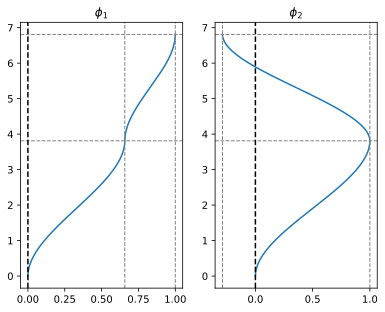

In [88]:
#| label: fig-eigenvektoren
#| fig-cap: "Deformation des Mehrmassenschwingers anhand der Eigenvektoren"



#Numerische Daten generieren
w_eigenform_1_lamb = sp.lambdify(x, w_eigenform_1.rhs)
w_eigenform_2_lamb = sp.lambdify(x, w_eigenform_2.rhs)

x_array = np.linspace(0, float((H_1+H_2).subs(params_plot)), 1000)

w_1_array = w_eigenform_1_lamb(x_array)
w_2_array = w_eigenform_2_lamb(x_array)


# Figure und Axes erstellen
fig, (ax1, ax2) = plt.subplots(1, 2)

# Ersten Plot erstellen

ax1.plot(w_1_array, x_array)
ax1.set_title('$\phi_1$')

## Horizontale Linien
ax1.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax1.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax1.axvline(phi_21.subs(params),linestyle='dashed', color='gray',linewidth=1)
ax1.axvline(phi_11.subs(params),linestyle='dashed', color='gray',linewidth=1)

ax1.axvline(0,linestyle='dashed', color='black')




# Zweiten Plot erstellen

ax2.plot(w_2_array, x_array)
ax2.set_title('$\phi_2$')

## Horizontale Linien
ax2.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax2.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax2.axvline(phi_22.subs(params),linestyle='dashed', color='gray',linewidth=1)
ax2.axvline(phi_12.subs(params),linestyle='dashed', color='gray',linewidth=1)

ax2.axvline(0,linestyle='dashed', color='black')


# Plots anzeigen
plt.show()




### Modale Analyse

Die Modale Analyse zielt darauf ab, den Zweimassenschwinger zu entkoppeln. Dazu wird in einem ersten Schritt die Orthogonalitätsbedingung kontrolliert. Diese muss erfüllt sein um eine Entkoppelung durchzuführen.

#### Orthogonalitätsbedingung

Angewendet auf die Massenmatrix:
Es zeigen sich kleine numerische Unreinheiten, welche vernachlässigt werden können.

In [89]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                     2⎤
  T        ⎢5.71e+3⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                    2⎤
  T        ⎢2.5e+3⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

           ⎡                      2⎤
  T        ⎢1.59e-12⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₁ = ⎢───────────────────────⎥
           ⎣         meter         ⎦

           ⎡                      2⎤
  T        ⎢1.59e-12⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₂ = ⎢───────────────────────⎥
           ⎣         meter         ⎦

Für die Steifigkeitsmatrix:

In [90]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(4),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(4))

  T        ⎡1.45e+5⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡8.28e+5⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡9.459e-11⋅newton⎤
φ₂ ⋅K⋅φ₁ = ⎢────────────────⎥
           ⎣     meter      ⎦

  T        ⎡9.459e-11⋅newton⎤
φ₁ ⋅K⋅φ₂ = ⎢────────────────⎥
           ⎣     meter      ⎦

#### Modal- und Spektralmatrix

Mittels der Modal- und Spektralmatrix lassen sich die generalisierten Grössen effizient ermitteln.

In [91]:
Phi = sp.Matrix([[phi_1, phi_2]])
Omega = sp.Matrix([[omega_1, 0],[0, omega_2]])

render.eq_display('Modalmatrix', 'Phi',
                  sp.MatrixSymbol('Phi', 2, 2), Phi.subs(params).evalf(4),
                  'Spektralmatrix', 'Omega^2',
                  sp.MatrixSymbol('Omega^2', 2, 2), (Omega**2).subs(params).evalf(4))

Modalmatrix = Φ

    ⎡0.6573    1.0  ⎤
Φ = ⎢               ⎥
    ⎣ 1.0    -0.2876⎦

                  2
Spektralmatrix = Ω 

     ⎡ 25.38          ⎤
     ⎢───────     0   ⎥
     ⎢      2         ⎥
     ⎢second          ⎥
Ω² = ⎢                ⎥
     ⎢          331.7 ⎥
     ⎢   0     ───────⎥
     ⎢               2⎥
     ⎣         second ⎦

#### Generalisierte Grössen

In [92]:
M_star = Phi.T * M * Phi
K_star = Phi.T * K * Phi


render.eq_display(sp.MatrixSymbol('M^\star', 2,2),sp.simplify(M_star.subs(params)).evalf(5),
                  sp.MatrixSymbol('K^\star', 2,2),sp.simplify(K_star.subs(params)).evalf(5))
                 

           ⎡                      2                            2⎤
           ⎢  5707.3⋅newton⋅second     1.5916e-12⋅newton⋅second ⎥
           ⎢  ─────────────────────    ─────────────────────────⎥
           ⎢          meter                      meter          ⎥
M__\star = ⎢                                                    ⎥
           ⎢                        2                        2  ⎥
           ⎢1.5916e-12⋅newton⋅second     2497.0⋅newton⋅second   ⎥
           ⎢─────────────────────────    ─────────────────────  ⎥
           ⎣          meter                      meter          ⎦

           ⎡1.4487e+5⋅newton   9.4587e-11⋅newton⎤
           ⎢────────────────   ─────────────────⎥
           ⎢     meter               meter      ⎥
K__\star = ⎢                                    ⎥
           ⎢9.4587e-11⋅newton  8.2813e+5⋅newton ⎥
           ⎢─────────────────  ──────────────── ⎥
           ⎣      meter             meter       ⎦

#### Kontrolle der modalen Transformation

Die Eigenkreisfrequenzen ändern sich durch die Transformation nicht.

In [93]:
omega_1_kontrolle = sp.sqrt(K_star[0] / M_star[0])
omega_2_kontrolle = sp.sqrt(K_star[3] / M_star[3])

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_1_modal', omega_1_kontrolle.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(4),
                  'omega_2_modal', omega_2_kontrolle.subs(params).simplify().evalf(4))




      5.04 
ω₁ = ──────
     second

             5.04 
ω_1_modal = ──────
            second

     18.21 
ω₂ = ──────
     second

            18.21 
ω_2_modal = ──────
            second

#### Partizipationsfaktor $\Gamma$

Die Verteilung des Partizipationsfaktor gibt einen direkten Hinweis, welcher Eigenmode an der Gesamtanwort den grössten Einfluss (beteiligt bzw. partizipiert) hat.

$$\Gamma_n = \frac{\Phi_n^T \mathbf{M 1}}{\Phi_n^T \mathbf{M}\Phi_n}$$

In allgemeiner Form lautet der Partizipationsfaktor:

$$
\Gamma_n = \frac{\Phi_n^T \mathbf{M r^\star}}{\Phi_n^T \mathbf{M}\Phi_n}
$${#eq-split_part}

$\mathbf{r^\star}$ beschreibt die Starrkörperverschiebung infolge der Erdbebenanregung $u_g$ am Fusspunkt des Gesamtsystems.



$$\mathbf{r^\star} = \begin{bmatrix}
FHG_1 \\
FHG_2 
\end{bmatrix}=
\begin{bmatrix}
\cos(0) \\
\cos(0) 
\end{bmatrix}=
\begin{bmatrix}
1 \\
1 
\end{bmatrix}= \mathbf{1}$$

Die Partizipationsmatrix lässt sich direkt durch folgende Gleichung ermitteln:

$$
\Gamma = M^{\star-1} \cdot \Phi^T \cdot M \cdot 1
$${#eq-matrix_part}

Gelöst mit @eq-matrix_part:

In [94]:
Gamma = M_star**-1 * Phi.T * M*one_vec 

render.eq_display(
    sp.MatrixSymbol('Gamma',2,1), Gamma.subs(params).evalf(3))

    ⎡1.08 ⎤
Γ = ⎢     ⎥
    ⎣0.288⎦

Gelöst mit @eq-split_part:

In [95]:
one_vec = sp.ones(2,1)

gamma_1 = (phi_1.T*M*one_vec)[0]/(phi_1.T*M*phi_1)[0]
gamma_2 = (phi_2.T*M*one_vec)[0]/(phi_2.T*M*phi_2)[0]
gamma_sqr = sp.Matrix([[gamma_1**2],[gamma_2**2]])
render.eq_display('Gamma_1', gamma_1,
                  'Gamma_1', gamma_1.subs(params).evalf(3),
                  'Gamma_2', gamma_2,
                  'Gamma_2', gamma_2.subs(params).evalf(3),
                  sp.MatrixSymbol('Gamma^2_n',2,1),gamma_sqr.subs(params).evalf(3))

      m₁⋅φ₁₁ + m₂⋅φ₂₁ 
Γ₁ = ─────────────────
           2         2
     m₁⋅φ₁₁  + m₂⋅φ₂₁ 

Γ₁ = 1.08

      m₁⋅φ₁₂ + m₂⋅φ₂₂ 
Γ₂ = ─────────────────
           2         2
     m₁⋅φ₁₂  + m₂⋅φ₂₂ 

Γ₂ = 0.288

      ⎡ 1.17 ⎤
Γ²ₙ = ⎢      ⎥
      ⎣0.0831⎦

### Elastisches Antwortspektrum

Aus der Aufgabenstellung darf nach [@SIA261_2020] Abs. 16.2.3.1 Kurve $E$ gewählt werden.

In [96]:
a_gd = 1 *unit.m /unit.second**2

#### Grundschwingzeit

Die Grundschwingzeit kann anhand der bereits ermittelten Eigenkreisfrequenzen ermittelt werden.

In [97]:
T_1 = (omega_1 /(2*sp.pi))**-1
T_2 = (omega_2 /(2*sp.pi))**-1

render.eq_display('T_1', T_1.subs(params).evalf(3),
                  'T_2', T_2.subs(params).evalf(3),
                  )

T₁ = 1.25⋅second

T₂ = 0.345⋅second

#### Elastisches Antwortspektrum

In [98]:

S_e_1 = antwortspektrum(a_gd, T_1.subs(params).evalf(3), Baugrundklasse='E')
render.eq_display('S_e_1', S_e_1.evalf(3))

     2.5⋅S⋅T_C⋅a_gd⋅η
Sₑ = ────────────────
            T        

       0.852⋅meter
Sₑ ₁ = ───────────
               2  
         second   

In [99]:
S_e_2 = antwortspektrum(a_gd, T_2.subs(params).evalf(3), Baugrundklasse = 'E')

render.eq_display('S_e_2', S_e_2.evalf(3))

     2.5⋅S⋅T_C⋅a_gd⋅η
Sₑ = ────────────────
            T        

       3.08⋅meter
Sₑ ₂ = ──────────
              2  
        second   

### Maximale Deformation

Die maximale Deformation resultiert aus der Beschleunigung $S_e$ und der Eigenkreisfrequenz $\omega_n^2$. Für die Modalen EMS gilt es diese anhand der Partizipationsfaktoren zu gewichten. Zur effektiven Bestimmung der Auslenkung sind die Resultate der EMS mittels SRSS-Regel zu überlagern.

In [100]:
q_1_max = Gamma[0] * S_e_1 / omega_1**2
q_2_max = Gamma[1] * S_e_2 / omega_2**2

render.eq_display('q_1_max',"Gamma_1 * S_e_1 / omega_1**2",
'q_1_max', q_1_max.subs(params).evalf(3),
'q_2_max',"Gamma_2 * S_e_2 / omega_2**2",
'q_2_max', q_2_max.subs(params).evalf(3))


         Γ₁⋅Sₑ ₁
q₁ ₘₐₓ = ───────
             2  
           ω₁   

q₁ ₘₐₓ = 0.0364⋅meter

         Γ₂⋅Sₑ ₂
q₂ ₘₐₓ = ───────
             2  
           ω₂   

q₂ ₘₐₓ = 0.00268⋅meter

Um die Entkoppelung rückzuführen gilt es die erhaltenen Resultate zu überlagern. Dabei gibt es unterschiedliche Ansätze. Bei weit auseinander liegenden Eigenfrequenzen kann die SRSS-Überlagerung verwendet werden.

$$u_{max} = \sqrt{\sum_{n=1}^2 (q_{n} \cdot \phi_n)^2}$$

In [101]:
u_max = ((phi_1*q_1_max).applyfunc(lambda x: x**2)+(phi_2*q_2_max).applyfunc(lambda x: x**2)).applyfunc(sp.sqrt)


render.eq_display(sp.MatrixSymbol('u_max', 2,1), u_max.subs(params).evalf(3))

       ⎡0.024⋅meter ⎤
uₘₐₓ = ⎢            ⎥
       ⎣0.0364⋅meter⎦

In [102]:
Delta_A, Delta_B, zeta = sp.symbols('Delta_A, Delta_B, zeta')



#Ansatzfunktion für Teil 1 der Funktion
zeta = x/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)

w_1_x = w_ansatz.subs(Delta_A, 0).subs(Delta_B, u_max[0].subs(params)/unit.m).subs(l,H_1.subs(params_plot))




#Ansatzfunktion für Teil 2 der Funktion
zeta = (x-H_1.subs(params_plot))/l
w_ansatz = Delta_A + (Delta_B-Delta_A)*(3*zeta**2 - 2*zeta**3)

w_2_x = w_ansatz.subs(Delta_A, u_max[0].subs(params)/unit.m).subs(Delta_B, u_max[1].subs(params)/unit.m).subs(l,H_2.subs(params_plot))



#Zusammengestellt
w_eigenform_1 = sp.Eq(w,sp.Piecewise((w_1_x, x<=H_1.subs(params_plot)),(w_2_x, x>=H_1.subs(params_plot))))


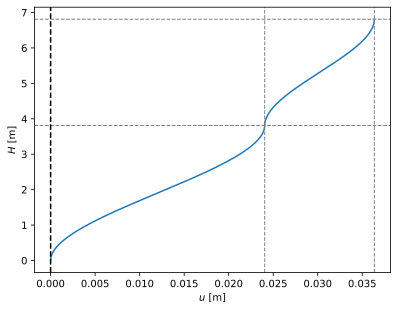

In [103]:
#| label: fig-deformation
#| fig-cap: "Maximale Deformation des Mehrmassenschwingers"



#Numerische Daten generieren
w_eigenform_1_lamb = sp.lambdify(x, w_eigenform_1.rhs)

x_array = np.linspace(0, float((H_1+H_2).subs(params_plot)), 1000)

w_1_array = w_eigenform_1_lamb(x_array)



# Ersten Plot erstellen

plt.plot(w_1_array, x_array)

## Horizontale Linien
plt.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
plt.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

plt.axvline(u_max[1].subs(params)/unit.m,linestyle='dashed', color='gray',linewidth=1)
plt.axvline(u_max[0].subs(params)/unit.m,linestyle='dashed', color='gray',linewidth=1)

plt.axvline(0,linestyle='dashed', color='black')
plt.xlabel('$u$ [m]')
plt.ylabel('$H$ [m]')


# Plots anzeigen
plt.show()




### Maximale Schnittkräfte

#### Querkräfte

Die Einwirkungen resultieren aus der Masse multipliziert mit der Beschleunigung aus dem Antwortspektrum. Dazu sind in einem ersten Schritt die beiden entkoppelten EMS von einander getrennt zu betrachten. Die Überlagerung erfolgt erst bei den ermittelten Querkräften.

$$
M_1 = \Gamma \cdot M \cdot \phi_1
$$

$$
F_{1max} = M_1 \cdot S_{e1}
$$

Aus dem ersten EMS folgt:

In [104]:
M_1 = Gamma[0] * M * phi_1
F_1_max = M_1* S_e_1
V_1 = sp.Matrix([[F_1_max[0]+F_1_max[1]],[F_1_max[1]]])

render.eq_display(sp.MatrixSymbol('M_1', 2,1), m_1.subs(params).evalf(5),
                  sp.MatrixSymbol('F_1_max', 2,1), F_1_max.subs(params).evalf(5),
                  sp.MatrixSymbol('V_1', 2,1), V_1.subs(params).evalf(5))

False

         ⎡1273.7⋅newton⎤
F₁ ₘₐₓ = ⎢             ⎥
         ⎣4429.2⋅newton⎦

     ⎡5702.9⋅newton⎤
V₁ = ⎢             ⎥
     ⎣4429.2⋅newton⎦

Aus dem zweiten EMS folglich:

In [105]:
M_2 = Gamma[1] * M * phi_2
F_2_max = M_2* S_e_2
V_2 = sp.Matrix([[F_2_max[0]+F_2_max[1]],[F_2_max[1]]])

render.eq_display(sp.MatrixSymbol('M_2', 2,1), M_2.subs(params).evalf(5),
                  sp.MatrixSymbol('F_2_max', 2,1), F_2_max.subs(params).evalf(5),
                  sp.MatrixSymbol('V_2', 2,1), V_2.subs(params).evalf(5))


     ⎡                     2 ⎤
     ⎢ 605.23⋅newton⋅second  ⎥
     ⎢ ───────────────────── ⎥
     ⎢         meter         ⎥
M₂ = ⎢                       ⎥
     ⎢                     2 ⎥
     ⎢-397.83⋅newton⋅second  ⎥
     ⎢───────────────────────⎥
     ⎣         meter         ⎦

         ⎡1864.2⋅newton ⎤
F₂ ₘₐₓ = ⎢              ⎥
         ⎣-1225.4⋅newton⎦

     ⎡638.82⋅newton ⎤
V₂ = ⎢              ⎥
     ⎣-1225.4⋅newton⎦

Maximale Querkraft aus Überlagerung beider EMS mittels SRSS-Regel.

$$
V_{max} = \sqrt{V_1^2 + V_2^2}
$$

In [106]:
V_max = (V_1.applyfunc(lambda x: x**2)+V_2.applyfunc(lambda x: x**2)).applyfunc(sp.sqrt)


render.eq_display(sp.MatrixSymbol('V_max', 2,1), V_max.subs(params).evalf(3))

       ⎡5.74e+3⋅newton⎤
Vₘₐₓ = ⎢              ⎥
       ⎣4.6e+3⋅newton ⎦

#### Biegemomente

Die Biegemomente lassen sich abschliessend anhand der Querkräfte bestimmen.

#### Normalkräfte

Die Normalkräfte resultieren aus den Punktmassen.

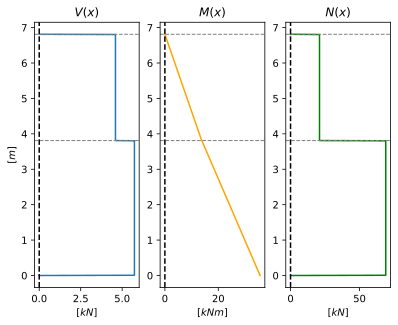

In [107]:
#| label: fig-schnittgroessen
#| fig-cap: "Maximale Schnittgrössen"

# Querkraft
V_x = sp.Piecewise((V_max[0].subs(params)/unit.N, ((x>0)&(x<=H_1.subs(params_plot)))), (V_max[1].subs(params)/unit.N, ((x>=H_1.subs(params_plot))&(x<=(H_1+H_2).subs(params_plot)))), (0,True))

# Biegemoment
C_1 = sp.symbols('C_1')
M_x = sp.integrate(-V_x, x) + C_1
C_1_solve = sp.solve(M_x.subs(x, (H_1+H_2).subs(params_plot)), C_1)[0]
M_x = M_x.subs(C_1, C_1_solve)

# Normalkraft
g = 10*unit.m/unit.second**2
N_x = sp.Piecewise(((m_1+m_2).subs(params)*g/unit.N, ((x>0)&(x<=H_1.subs(params_plot)))),(m_1.subs(params)*g/unit.N, ((x>=H_1.subs(params_plot))&(x<=(H_1+H_2).subs(params_plot)))), (0,True))



# Numerische Daten generieren
V_x_lamb = sp.lambdify(x, V_x)
V_x_array = V_x_lamb(x_array)

M_x_lamb = sp.lambdify(x,M_x)
M_x_array = M_x_lamb(x_array)

N_x_lamb = sp.lambdify(x,N_x)
N_x_array = N_x_lamb(x_array)

# Figure und Axes erstellen
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Ersten Plot erstellen

ax1.plot(V_x_array/1000, x_array)
ax1.set_title('$V(x)$')

## Horizontale Linien
ax1.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax1.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax1.set_xlabel('$[kN]$')
ax1.set_ylabel('$[m]$')

ax1.axvline(0,linestyle='dashed', color='black')


# Zweiten Plot erstellen

ax2.plot(M_x_array/1000, x_array, color='orange')
ax2.set_title('$M(x)$')

## Horizontale Linien
ax2.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax2.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax2.set_xlabel('$[kNm]$')

ax2.axvline(0,linestyle='dashed', color='black')


# Dritten Plot erstellen

ax3.plot(N_x_array/1000, x_array, color='green')
ax3.set_title('$N(x)$')
ax3.set_xlabel('$[kN]$')


## Horizontale Linien
ax3.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax3.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)


ax3.axvline(0,linestyle='dashed', color='black')



# Plots anzeigen
plt.show()


